In [1]:
# import the necessary packages 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import gridspec 

In [2]:
# Load the dataset from the csv file using pandas 
# best way is to mount the drive on colab and  
# copy the path for the csv file 
path ="creditcard.csv"
data = pd.read_csv(path) 


In [3]:
# Grab a peek at the data 
data.head() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Print the shape of the data 
# data = data.sample(frac = 0.1, random_state = 48) 
print(data.shape) 
print(data.describe()) 

(15936, 31)
               Time            V1            V2            V3            V4  \
count  15936.000000  15936.000000  15936.000000  15936.000000  15936.000000   
mean   12121.217871     -0.254293      0.277171      0.803852      0.301343   
std     8982.283843      1.843083      1.491497      1.704252      1.491713   
min        0.000000    -28.344757    -40.978852    -27.368650     -5.172595   
25%     3633.500000     -0.970824     -0.286548      0.371671     -0.621215   
50%    10980.000000     -0.318478      0.247437      0.941822      0.231366   
75%    20621.500000      1.161949      0.884689      1.575960      1.180124   
max    27371.000000      1.960497     14.601998      4.101716     11.927512   

                 V5            V6            V7            V8            V9  \
count  15936.000000  15936.000000  15936.000000  15936.000000  15936.000000   
mean      -0.130469      0.112551     -0.150434      0.000687      0.860838   
std        1.382485      1.329406      

In [5]:
# Determine number of fraud cases in dataset 
fraud = data[data['Class'] == 1] 
valid = data[data['Class'] == 0] 
outlierFraction = len(fraud)/float(len(valid)) 
print(outlierFraction) 
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1]))) 
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0]))) 


0.0046019038012986195
Fraud Cases: 73
Valid Transactions: 15863


In [6]:
print("Amount details of the fraudulent transaction") 
fraud.Amount.describe() 

Amount details of the fraudulent transaction


count      73.000000
mean       90.307123
std       271.634360
min         0.000000
25%         1.000000
50%         1.000000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [7]:
print("details of valid transaction") 
valid.Amount.describe() 

details of valid transaction


count    15863.000000
mean        66.276068
std        188.893631
min          0.000000
25%          5.520000
50%         15.950000
75%         53.890000
max       7712.430000
Name: Amount, dtype: float64

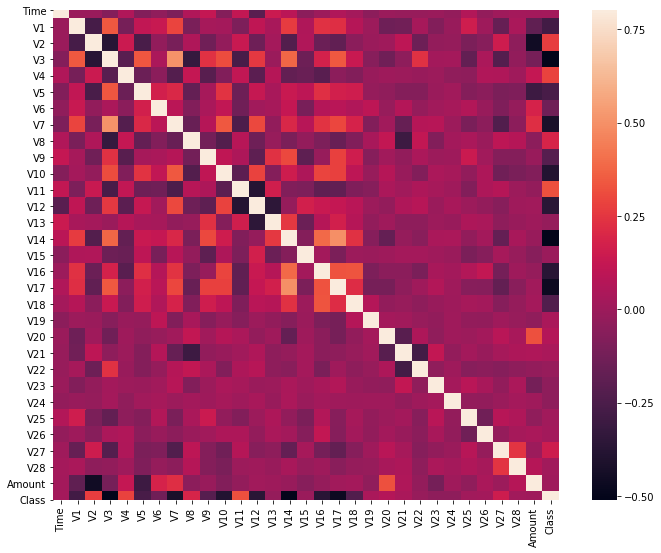

In [8]:
# Correlation matrix 
corrmat = data.corr() 
fig = plt.figure(figsize = (12, 9)) 
sns.heatmap(corrmat, vmax = .8, square = True) 
plt.show() 

In [9]:
# dividing the X and the Y from the dataset 
X = data.drop(['Class'], axis = 1) 
Y = data["Class"] 
print(X.shape) 
print(Y.shape) 
# getting just the values for the sake of processing  
# (its a numpy array with no columns) 
xData = X.values 
yData = Y.values 

(15936, 30)
(15936,)


In [10]:
# Using Skicit-learn to split data into training and testing sets 
from sklearn.model_selection import train_test_split 
# Split the data into training and testing sets 
xTrain, xTest, yTrain, yTest = train_test_split( 
        xData, yData, test_size = 0.2, random_state = 42) 


In [11]:
# Building the Random Forest Classifier (RANDOM FOREST) 
from sklearn.ensemble import RandomForestClassifier 
# random forest model creation 
rfc = RandomForestClassifier() 
rfc.fit(xTrain, yTrain) 
# predictions 
yPred = rfc.predict(xTest) 

C:\Users\KARTHIK\anaconda4\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [12]:
# Evaluating the classifier 
# printing every score of the classifier 
# scoring in anything 
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 
  
n_outliers = len(fraud) 
n_errors = (yPred != yTest).sum() 
print("The model used is Random Forest classifier") 
  
acc = accuracy_score(yTest, yPred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(yTest, yPred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(yTest, yPred) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(yTest, yPred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(yTest, yPred) 
print("The Matthews correlation coefficient is{}".format(MCC)) 

The model used is Random Forest classifier
The accuracy is 0.9996863237139272
The precision is 1.0
The recall is 0.9444444444444444
The F1-Score is 0.9714285714285714
The Matthews correlation coefficient is0.9716720673139997


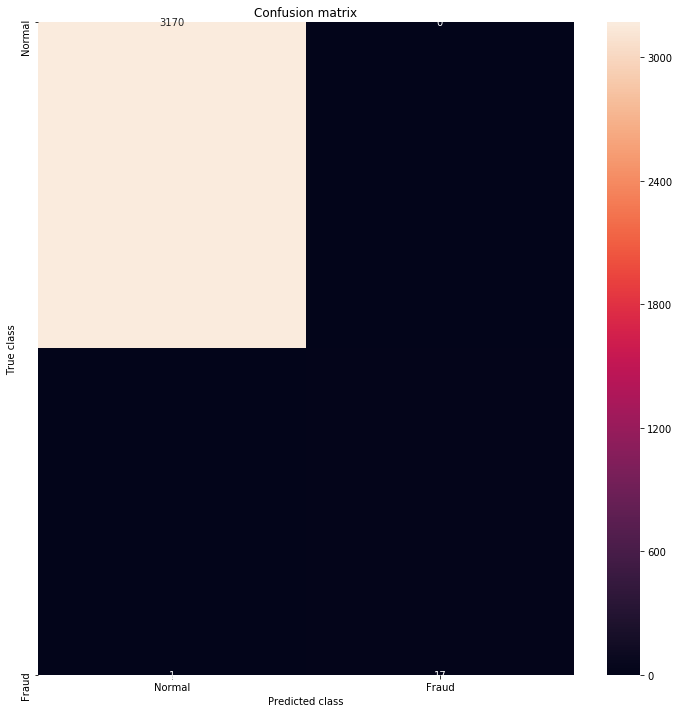

In [13]:
# printing the confusion matrix 
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(yTest, yPred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 